# Best Practices for Preprocessing Natural Language Data

In this notebook, we improve the quality of our Project Gutenberg word vectors by adopting best-practices for preprocessing natural language data.

**N.B.:** Some, all or none of these preprocessing steps may be helpful to a given downstream application. 

#### Load dependencies

In [1]:
# the initial block is copied from creating_word_vectors_with_word2vec.ipynb
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mnoordeen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# new!
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

Using TensorFlow backend.


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mnoordeen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Load data

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/mnoordeen/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg

In [7]:
gberg_sents = gutenberg.sents()

#### Iteratively preprocess a sentence

##### a tokenized sentence: 

In [8]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

##### to lowercase: 

In [9]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

##### remove stopwords and punctuation: 

In [10]:
stpwrds = stopwords.words('english') + list(string.punctuation)

In [11]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
[w.lower() for w in gberg_sents[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

##### stem words: 

In [13]:
stemmer = PorterStemmer()

In [14]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w not in stpwrds]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

##### handle bigram collocations:

In [15]:
phrases = Phrases(gberg_sents) # train detector

In [16]:
bigram = Phraser(phrases) # create a more efficient Phraser object for transforming sentences

In [17]:
bigram.phrasegrams # output count and score of each bigram

{(b'two', b'daughters'): (19, 11.966813731181546),
 (b'her', b'sister'): (195, 17.7960829227865),
 (b"'", b's'): (9781, 31.066242737744524),
 (b'very', b'early'): (24, 11.01214147275924),
 (b'Her', b'mother'): (14, 13.529425062715127),
 (b'long', b'ago'): (38, 63.22343628984788),
 (b'more', b'than'): (541, 29.023584433996874),
 (b'had', b'been'): (1256, 22.306024648925288),
 (b'an', b'excellent'): (54, 39.063874851750626),
 (b'Miss', b'Taylor'): (48, 453.75918026073305),
 (b'very', b'fond'): (28, 24.134280468850747),
 (b'passed', b'away'): (25, 12.35053642325912),
 (b'too', b'much'): (173, 31.376002029426687),
 (b'did', b'not'): (935, 11.728416217142811),
 (b'any', b'means'): (27, 14.096964108090186),
 (b'wedding', b'-'): (15, 17.4695197740113),
 (b'Her', b'father'): (18, 13.129571562488772),
 (b'after', b'dinner'): (21, 21.5285481168817),
 (b'self', b'-'): (124, 47.79018053120332),
 (b'sixteen', b'years'): (12, 107.0461671612265),
 (b'five', b'years'): (42, 40.128755673408115),
 (b'ye

In [18]:
"Jon lives in New York City".split()

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [19]:
bigram["Jon lives in New York City. Frank Churchill Miss Smith".split()]

['Jon', 'lives', 'in', 'New_York', 'City.', 'Frank_Churchill', 'Miss_Smith']

#### Preprocess the corpus

In [20]:
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [21]:
lower_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [22]:
lower_bigram = Phraser(Phrases(lower_sents))

In [23]:
lower_bigram.phrasegrams # miss taylor, mr woodhouse, mr weston

{(b'two', b'daughters'): (19, 11.080802900992637),
 (b'her', b'sister'): (201, 16.93971298099339),
 (b'very', b'early'): (25, 10.516998773665177),
 (b'her', b'mother'): (253, 10.70812618607742),
 (b'long', b'ago'): (38, 59.226442015336005),
 (b'more', b'than'): (562, 28.529926612065935),
 (b'had', b'been'): (1260, 21.583193129694834),
 (b'an', b'excellent'): (58, 37.41859680854167),
 (b'sixteen', b'years'): (15, 131.42913000977515),
 (b'miss', b'taylor'): (48, 420.4340982546865),
 (b'mr', b'woodhouse'): (132, 104.19907841850323),
 (b'very', b'fond'): (30, 24.185726346489627),
 (b'passed', b'away'): (25, 11.751473221742694),
 (b'too', b'much'): (177, 30.36309017383541),
 (b'did', b'not'): (977, 10.846196223896685),
 (b'any', b'means'): (28, 14.294148100212627),
 (b'after', b'dinner'): (22, 18.60737125272944),
 (b'mr', b'weston'): (162, 91.63290824201266),
 (b'five', b'years'): (42, 37.66428596665674),
 (b'years', b'old'): (176, 48.599094446190286),
 (b'seven', b'years'): (53, 50.3345604

In [24]:
lower_bigram["jon lives in new york city".split()]

['jon', 'lives', 'in', 'new_york', 'city']

In [25]:
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))
lower_bigram.phrasegrams

{(b'afar', b'off'): (52, 108.14220347465505),
 (b'burnt', b'offering'): (184, 297.524653753951),
 (b'burnt', b'offerings'): (86, 299.15702343127646),
 (b'buster', b'bear'): (142, 479.87410772225826),
 (b'captain', b'benwick'): (56, 241.49037086312987),
 (b'captain', b'wentworth'): (196, 529.8756608388247),
 (b'charles', b'hayter'): (33, 92.03437785214481),
 (b'chief', b'priests'): (65, 116.31947753846512),
 (b'colonel', b'brandon'): (132, 1313.0078125),
 (b'couldn', b't'): (89, 171.76138536935215),
 (b'cut', b'off'): (217, 129.60290535032792),
 (b'dare', b'say'): (115, 89.94000515807346),
 (b'de', b'grey'): (77, 603.2109624246722),
 (b'didn', b't'): (180, 220.51081560283686),
 (b'doesn', b't'): (53, 106.2634985949418),
 (b'don', b't'): (830, 250.30957446808512),
 (b'dr', b'bull'): (65, 680.7870294599019),
 (b'dr', b'middleton'): (40, 162.73103819257668),
 (b'drawing', b'room'): (49, 84.91494947493561),
 (b'farmer', b'brown'): (100, 386.05179596892236),
 (b'father', b'brown'): (207, 91.

In [26]:
# as in Maas et al. (2001):
# - leave in stop words ("indicative of sentiment")
# - no stemming ("model learns similar representations of words of the same stem when data suggests it")
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [27]:
clean_sents[0:9]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [28]:
clean_sents[6] # could consider removing stop words or common words

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

#### Run word2vec

In [29]:
# max_vocab_size can be used instead of min_count (which has increased here)
# model = Word2Vec(sentences=clean_sents, size=64, sg=1, window=10, min_count=10, seed=42, workers=8)
# model.save('clean_gutenberg_model.w2v')

#### Explore model

In [31]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('clean_gutenberg_model.w2v')

In [32]:
len(model.wv.vocab) # down from 17k in previous notebook

4221

In [33]:
model['ma_am']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-3.9243796e-01,  4.9369171e-04,  8.6267400e-01, -2.2459787e-01,
       -4.4390219e-01, -3.6774173e-01,  7.1554497e-02, -1.3946787e-01,
        2.3939544e-01, -2.5734380e-01,  6.9949985e-02, -1.3822051e-02,
        3.3667448e-01,  1.9478427e-01,  1.3677713e-01, -3.1613576e-01,
        1.0117499e-01,  2.2087145e-01, -6.1993814e-01, -6.8318471e-02,
        3.8657555e-01,  5.1223767e-01,  2.6571909e-01,  2.2242150e-01,
        4.6986550e-01, -1.6757834e-01,  5.2309906e-01,  3.6207455e-01,
       -4.3382183e-01,  1.5120904e-01, -1.7853595e-01, -1.8676810e-01,
        1.1833830e-01,  4.8686439e-01,  3.3653542e-01,  6.2006429e-02,
        2.1576926e-01, -1.9963703e-01, -1.2627520e-02, -3.5904346e-03,
        1.9388416e-01, -2.5964138e-01,  1.1099315e-01, -8.1635654e-02,
        1.0332600e-01,  4.1003603e-01,  2.4784581e-01, -2.1865033e-01,
       -5.6442767e-01, -2.4364337e-01,  1.6171084e-01, -2.1701699e-01,
        4.8943722e-01, -7.6632500e-03,  9.7110361e-02, -4.9184862e-01,
      

In [34]:
model.most_similar('ma_am') 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('thank', 0.9433324933052063),
 ('aye', 0.9261847734451294),
 ('pray', 0.9211909174919128),
 ('sir', 0.9148183465003967),
 ('hesitatingly', 0.9136514663696289),
 ('.--"', 0.9083434343338013),
 ('excessively', 0.902546763420105),
 ('doctor', 0.9008283019065857),
 ('ay', 0.8955913782119751),
 ('walter', 0.8942696452140808)]

In [35]:
# swap woman and man
model.most_similar(positive=['ma_am', 'man'], negative=['woman']) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('hesitatingly', 0.8244139552116394),
 ('thank', 0.8097648024559021),
 ('recollect', 0.8082217574119568),
 ('gravely', 0.8034652471542358),
 ('sir', 0.8032914400100708),
 ('papa', 0.7962510585784912),
 ('yes', 0.795040488243103),
 ('aye', 0.7912753820419312),
 ('.--"', 0.789036750793457),
 ('depend_upon', 0.7812193632125854)]

In [36]:
model.most_similar(positive=['father', 'woman'], negative=['man']) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.801315188407898),
 ('husband', 0.7849768400192261),
 ('isabella', 0.7331461906433105),
 ('sister', 0.7182691097259521),
 ('aunt', 0.7182140350341797),
 ('friend', 0.7019449472427368),
 ('sake', 0.6935813426971436),
 ('brother', 0.6919012069702148),
 ('wishes', 0.6852743029594421),
 ('daughter', 0.6813851594924927)]

#### Reduce word vector dimensionality with t-SNE

In [39]:
tsne = TSNE(n_components=2, n_iter=1000)

In [40]:
X_2d = tsne.fit_transform(model[model.wv.vocab])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [41]:
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [42]:
coords_df.head()

,x,y,token
0,6.033686,-7.411902,emma
1,-5.113849,-18.800652,by
2,35.730682,4.747732,jane
3,-3.066119,-29.105110,volume
4,15.991074,40.169357,i


In [43]:
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

#### Visualise 

In [70]:
coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

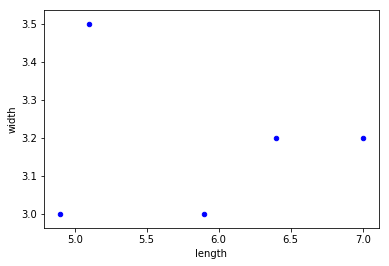

In [71]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                 [6.4, 3.2, 1], [5.9, 3.0, 2]],                   columns=['length', 'width', 'species'])
ax1 = df.plot.scatter(x='length',
                     y='width',
                      c='Blue')

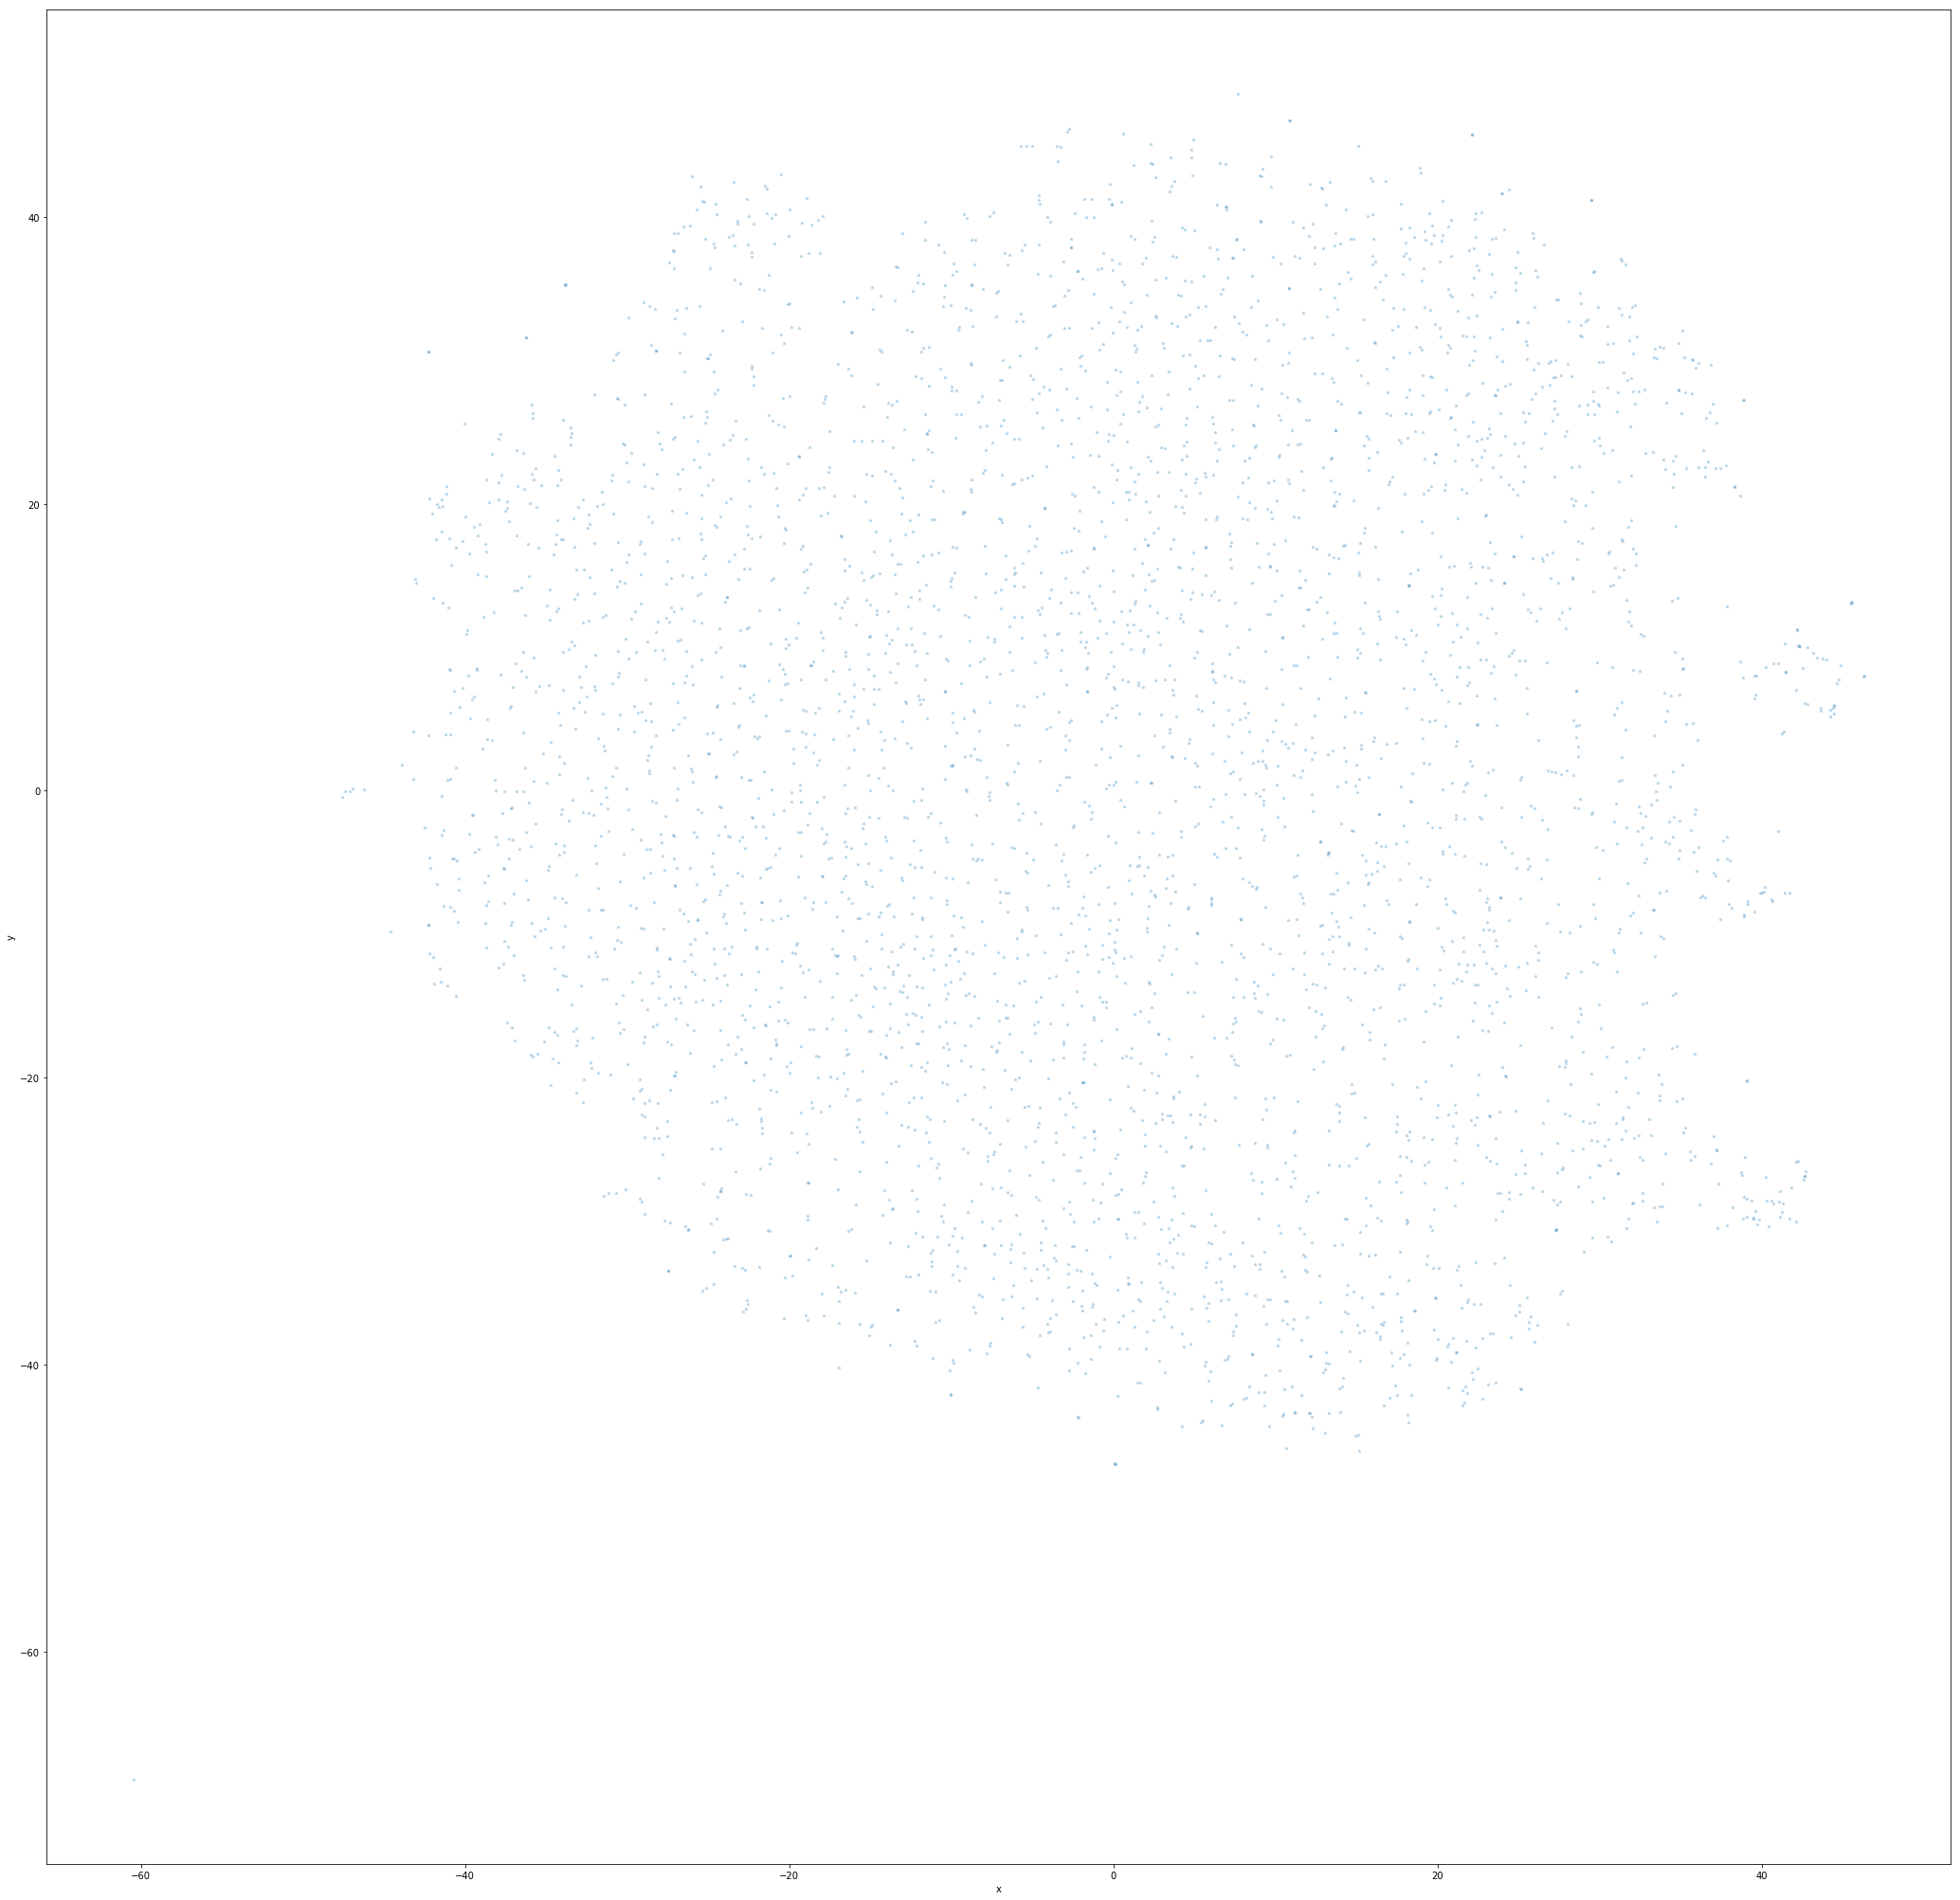

In [72]:
_ = coords_df.plot.scatter('x', 'y',figsize=(36,36), marker='*', s=10, alpha=0.2)

In [73]:
output_notebook()

Loading BokehJS ...

In [81]:
subset_df = coords_df.sample(n=10)

In [82]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [83]:
show(p)

In [ ]:
# output_file() here